In [11]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import pickle

# Set the path for the CSV file
path = "C:\SmoteTest\ResampleData_Safety.csv"


# Read the dataset from the CSV file and remove the last row
dataset = pd.read_csv(path)
dataset = dataset[:-1]
print(dataset[list(dataset.columns.values)[4]])

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
117    1.0
118    1.0
119    1.0
120    1.0
121    1.0
Name: safety, Length: 122, dtype: float64


In [12]:
# Split the dataset into training and testing sets (50-50 ratio) using stratified sampling based on 'safety' attribute
from sklearn.model_selection import train_test_split 
train, test = train_test_split(dataset, test_size=0.5, random_state=1, stratify=dataset['safety'], shuffle=True)

In [13]:
# Standardize the data using StandardScaler
from sklearn.preprocessing import StandardScaler 
ss_train = StandardScaler()
X_train = ss_train.fit_transform(train.iloc[:,4:])
y_train = train.iloc[:,4]
X_test = ss_train.transform(test.iloc[:,4:])
y_test = test.iloc[:,4]


In [14]:
print("First index \n", X_train[0])
print("Label ", y_train.iloc[0])

First index 
 [-0.98373875  0.          1.51000602  1.85406752  5.5713679   2.74894124
  2.43950726  2.77969509  1.35778804  1.54571473  1.85469901  5.57501425
  2.73307291  2.42527407  2.75510246  1.35764794  0.22481344  1.0224031
  2.66682754  2.05526239  1.7012128   2.25153313  1.35769823  1.02213646
  0.87282049  0.39139331  1.93369999  1.61951756  2.15547683  1.35764988
  0.42772208  0.44082172 -0.13965549  1.18841165  1.11199265  1.40587692
  1.35770037 -0.02061074 -0.01711162 -0.43205132  0.56196166  0.51954769
  0.63044556  1.35763734 -0.19564632 -0.19240991 -0.49203012  0.22992078
  0.20066863  0.25195864  1.3576601  -0.46096564 -0.48953506 -0.48916856
 -0.11502733 -0.18227222 -0.03198363  1.35764076 -0.68965551 -0.52930761
 -0.93517252 -0.38298785 -0.31270435 -0.5340721   1.35766969 -0.88168333
 -0.74836195 -0.9908219  -0.74332991 -0.68541459 -0.71241973  1.35765328
 -0.96594499 -0.88443096 -0.38523159 -0.79495106 -0.80868283 -0.81269581
  1.35766627 -0.92002163 -0.96266197 -

In [15]:
# Initialize several binary classifiers
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier(5)


In [16]:
#evaluating performance 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [17]:
print("Unique labels in y_train:", y_train.unique())


Unique labels in y_train: [0. 1.]


In [18]:
accuracy, precision, recall, f1Score = {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train, y_train)
    # Make predictions
    predictions = models[key].predict(X_test)
        
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test, pos_label=1)
    recall[key] = recall_score(predictions, y_test, pos_label=1)
    f1Score[key] = f1_score(predictions, y_test, pos_label=1)

    cm = confusion_matrix(y_test, predictions, labels =[0,1])

    TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

    print(key)
    print('True Positive(TP)  = ', TP)
    print('False Positive(FP) = ', FP)
    print('True Negative(TN)  = ', TN)
    print('False Negative(FN) = ', FN)
   
    print(' ')

Logistic Regression
True Positive(TP)  =  31
False Positive(FP) =  0
True Negative(TN)  =  30
False Negative(FN) =  0
 
Support Vector Machines
True Positive(TP)  =  31
False Positive(FP) =  0
True Negative(TN)  =  30
False Negative(FN) =  0
 
Decision Trees
True Positive(TP)  =  31
False Positive(FP) =  0
True Negative(TN)  =  30
False Negative(FN) =  0
 
Random Forest
True Positive(TP)  =  31
False Positive(FP) =  0
True Negative(TN)  =  30
False Negative(FN) =  0
 
Naive Bayes
True Positive(TP)  =  31
False Positive(FP) =  0
True Negative(TN)  =  30
False Negative(FN) =  0
 
K-Nearest Neighbor
True Positive(TP)  =  31
False Positive(FP) =  0
True Negative(TN)  =  30
False Negative(FN) =  0
 


In [19]:
# Create a DataFrame to display the performance metrics for each classifier
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1 Score'] = f1Score.values()

df_model

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,1.0,1.0,1.0,1.0
Support Vector Machines,1.0,1.0,1.0,1.0
Decision Trees,1.0,1.0,1.0,1.0
Random Forest,1.0,1.0,1.0,1.0
Naive Bayes,1.0,1.0,1.0,1.0
K-Nearest Neighbor,1.0,1.0,1.0,1.0


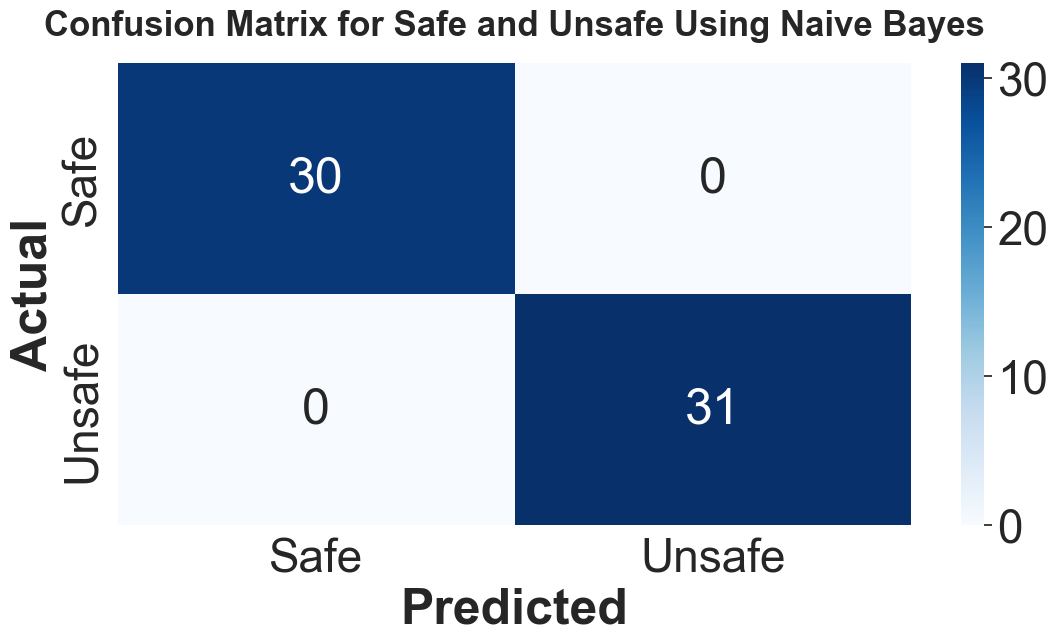

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import StratifiedKFold, cross_val_score

def plot_confusion_matrix(matrix, actual_classes, predicted_classes, sorted_labels):
    plt.figure(figsize=(12.8,6))
    sns.set(font_scale= 3)
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted', fontweight = 'bold' )
    plt.ylabel('Actual', fontweight = 'bold')
    plt.title('Confusion Matrix for Safe and Unsafe Using Naive Bayes',  pad=20, fontsize= 25, fontweight = 'bold')
    plt.show()

# Fit the NB model
nb = GaussianNB()



# Train the model on the whole training set
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb.predict(X_test)

# Generate the confusion matrix plot
cm = confusion_matrix(y_test, y_pred_nb)
sorted_labels = ['Safe', 'Unsafe']

plot_confusion_matrix(cm, y_test, y_pred_nb, sorted_labels)
